In this notebook, we'll work with a multi-class dataset and demonstrate how to set up your data for Keras.
The notes here are based on the notebook by Matthew Osborne, Ph.D., for the Erdős Institute Cőde Data Science Boot Camp

In [1]:
# let's import all the things

## For data handling
import pandas as pd
import numpy as np
import random
## For plotting
import matplotlib.pyplot as plt
from seaborn import set_style

## This sets the plot style
## to have a grid on a white background
set_style("white")

from keras.datasets import mnist

from keras import models
from keras import layers
from keras import optimizers
from keras import losses
from keras import metrics
from keras.utils import to_categorical

In [2]:
# in this first example, we'll use the mnist dataset
(X_train, y_train),(X_test, y_test) = mnist.load_data()

## Explore the data
You should always do a bit of EDA. Let's define a function to handle this

In [24]:
def explore_data(X_train):
    print('Shape of data is',np.shape(X_train))
    
    # randomly sample this dataset
    rand_Idxs = random.sample(range(len(X_train)),4)    
    
    plt.figure(figsize=(8,8))
    f, ax = plt.subplots(2,2)
    ax[0,0].imshow(X_train[rand_Idxs[0],:,:], cmap='gray')
    ax[0,1].imshow(X_train[rand_Idxs[1],:,:], cmap='gray')
    ax[1,0].imshow(X_train[rand_Idxs[2],:,:], cmap='gray')
    ax[1,1].imshow(X_train[rand_Idxs[3],:,:], cmap='gray')
    
    plt.show()

Shape of data is (60000, 28, 28)


<Figure size 576x576 with 0 Axes>

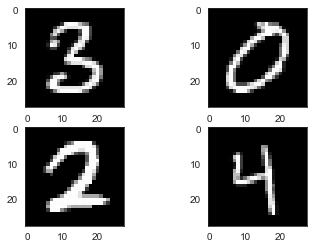

In [26]:
explore_data(X_train)

## Massage the data
Massage the input data. The inputs to keras should have shape (samples,features). We're not working with CNNs so the input should only be 2D.

In [27]:
# scale
X_train = X_train/255
X_test = X_test/255

# reshape
X_train = X_train.reshape(-1,28*28)
X_test = X_test.reshape(-1,28*28)
print("The new shape of X_train is", np.shape(X_train))
print("The new shape of X_test is", np.shape(X_test))

The new shape of X_train is (60000, 784)
The new shape of X_test is (10000, 784)


Furthermore, the training targets must be one-hot encoded. The MNIST targets are integers 0-9, and these need to be turned into categorical data.

In [28]:
print(y_train)

print("\n\n\n")

print(to_categorical(y_train))

y_train = to_categorical(y_train)

[5 0 4 ... 5 6 8]




[[0. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]]


Before proceeding, split the data into training vs validation sets

In [30]:
from sklearn.model_selection import train_test_split

X_train_train,X_val,y_train_train,y_val = train_test_split(X_train, y_train,
                                                          test_size=.2,
                                                          shuffle=True,
                                                          stratify=y_train,
                                                          random_state=440)

## Building a model
Now let's build our model & fit it

In [31]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(28*28,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

model.compile(optimizer='rmsprop',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 16)                12560     
_________________________________________________________________
dense_4 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_5 (Dense)              (None, 10)                170       
Total params: 13,002
Trainable params: 13,002
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
94/94 [==============================] - 1s 4ms/step - loss: 1.6718 - accuracy: 0.4652 - val_loss: 0.6540 - val_accuracy: 0.8447
Epoch 2/100
94/94 [==============================] - 0s 3ms/step - loss: 0.5532 - accuracy: 0.8633 - val_loss: 0.3996 - val_accuracy: 0.8851
Epoch 3/100
94/94 [==============================] - 0s 3ms/step - loss: 0.3717 - accuracy: 0.8963

94/94 [==============================] - 0s 3ms/step - loss: 0.1087 - accuracy: 0.9682 - val_loss: 0.1872 - val_accuracy: 0.9476
Epoch 54/100
94/94 [==============================] - 0s 2ms/step - loss: 0.1042 - accuracy: 0.9681 - val_loss: 0.1869 - val_accuracy: 0.9464
Epoch 55/100
94/94 [==============================] - 0s 3ms/step - loss: 0.1064 - accuracy: 0.9680 - val_loss: 0.1883 - val_accuracy: 0.9467
Epoch 56/100
94/94 [==============================] - 0s 3ms/step - loss: 0.1052 - accuracy: 0.9692 - val_loss: 0.1860 - val_accuracy: 0.9475
Epoch 57/100
94/94 [==============================] - 0s 2ms/step - loss: 0.1000 - accuracy: 0.9703 - val_loss: 0.1884 - val_accuracy: 0.9457
Epoch 58/100
94/94 [==============================] - 0s 2ms/step - loss: 0.0988 - accuracy: 0.9711 - val_loss: 0.1945 - val_accuracy: 0.9433
Epoch 59/100
94/94 [==============================] - 0s 2ms/step - loss: 0.1044 - accuracy: 0.9697 - val_loss: 0.1870 - val_accuracy: 0.9467
Epoch 60/100
94/94 

In [ ]:
history = model.fit(X_train_train,
                        y_train_train,
                        epochs = 100,
                        batch_size = 512,
                        validation_data=(X_val,y_val))

### Evaluate  training results

In [32]:
history_dict = history.history
print(history_dict.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


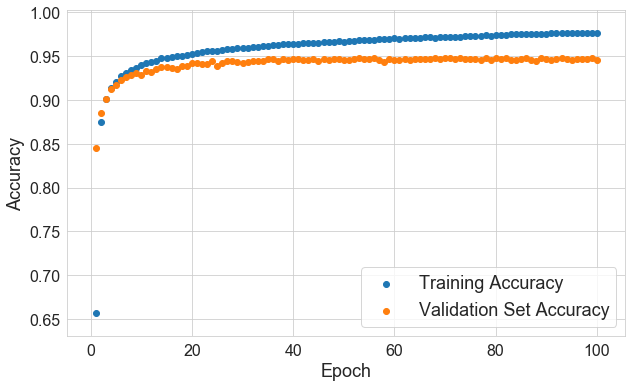

In [33]:
set_style("whitegrid")

plt.figure(figsize = (10,6))

plt.scatter(range(1,101), history_dict['accuracy'], label = "Training Accuracy")
plt.scatter(range(1,101), history_dict['val_accuracy'], label = "Validation Set Accuracy")

plt.xlabel("Epoch", fontsize=18)
plt.ylabel("Accuracy", fontsize=18)

plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

plt.legend(fontsize=18)

plt.show()

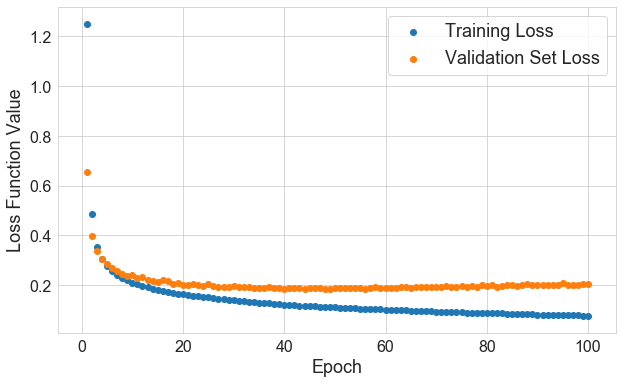

In [34]:
plt.figure(figsize = (10,6))

plt.scatter(range(1,101), history_dict['loss'], label = "Training Loss")
plt.scatter(range(1,101), history_dict['val_loss'], label = "Validation Set Loss")

plt.xlabel("Epoch", fontsize=18)
plt.ylabel("Loss Function Value", fontsize=18)

plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

plt.legend(fontsize=18)

plt.show()

## Fine-tuning model architecture

In [36]:
model2 = models.Sequential()

model2.add(layers.Dense(32, activation='relu', input_shape=(28*28,)))
model2.add(layers.Dense(32, activation='relu'))
model2.add(layers.Dense(10, activation='softmax'))

model2.compile(optimizer = 'adam',
                 loss = 'categorical_crossentropy',
                 metrics = ['accuracy'])

history2 = model2.fit(X_train_train,
                       y_train_train,
                       epochs = 100,
                       batch_size = 512,
                       validation_data = (X_val, y_val))

history_dict2 = history2.history

Epoch 1/100
94/94 [==============================] - 1s 4ms/step - loss: 1.5526 - accuracy: 0.5320 - val_loss: 0.4004 - val_accuracy: 0.8913
Epoch 2/100
94/94 [==============================] - 0s 3ms/step - loss: 0.3626 - accuracy: 0.8992 - val_loss: 0.2902 - val_accuracy: 0.9172
Epoch 3/100
94/94 [==============================] - 0s 4ms/step - loss: 0.2759 - accuracy: 0.9220 - val_loss: 0.2556 - val_accuracy: 0.9247
Epoch 4/100
94/94 [==============================] - 0s 3ms/step - loss: 0.2330 - accuracy: 0.9323 - val_loss: 0.2284 - val_accuracy: 0.9330
Epoch 5/100
94/94 [==============================] - 0s 3ms/step - loss: 0.2079 - accuracy: 0.9401 - val_loss: 0.2112 - val_accuracy: 0.9388
Epoch 6/100
94/94 [==============================] - 0s 3ms/step - loss: 0.1940 - accuracy: 0.9454 - val_loss: 0.1982 - val_accuracy: 0.9423
Epoch 7/100
94/94 [==============================] - 0s 3ms/step - loss: 0.1721 - accuracy: 0.9504 - val_loss: 0.1897 - val_accuracy: 0.9438
Epoch 8/100
9

Epoch 59/100
94/94 [==============================] - 0s 3ms/step - loss: 0.0208 - accuracy: 0.9947 - val_loss: 0.1624 - val_accuracy: 0.9625
Epoch 60/100
94/94 [==============================] - 0s 3ms/step - loss: 0.0192 - accuracy: 0.9964 - val_loss: 0.1641 - val_accuracy: 0.9630
Epoch 61/100
94/94 [==============================] - 0s 3ms/step - loss: 0.0179 - accuracy: 0.9964 - val_loss: 0.1688 - val_accuracy: 0.9623
Epoch 62/100
94/94 [==============================] - 0s 3ms/step - loss: 0.0182 - accuracy: 0.9960 - val_loss: 0.1655 - val_accuracy: 0.9636
Epoch 63/100
94/94 [==============================] - 0s 3ms/step - loss: 0.0175 - accuracy: 0.9962 - val_loss: 0.1689 - val_accuracy: 0.9618
Epoch 64/100
94/94 [==============================] - 0s 3ms/step - loss: 0.0161 - accuracy: 0.9967 - val_loss: 0.1712 - val_accuracy: 0.9629
Epoch 65/100
94/94 [==============================] - 0s 3ms/step - loss: 0.0162 - accuracy: 0.9962 - val_loss: 0.1765 - val_accuracy: 0.9615
Epoch 

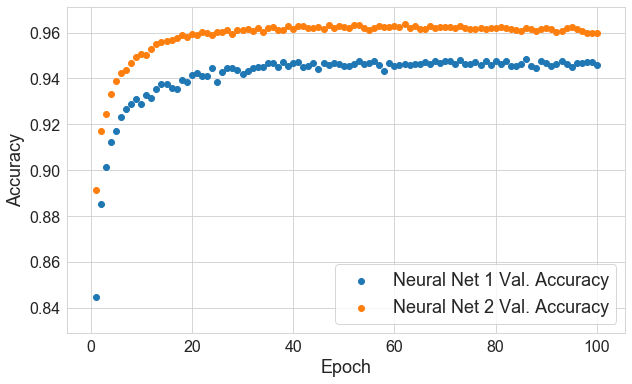

In [37]:
plt.figure(figsize = (10,6))

plt.scatter(range(1,101), history_dict['val_accuracy'], label = "Neural Net 1 Val. Accuracy")
plt.scatter(range(1,101), history_dict2['val_accuracy'], label = "Neural Net 2 Val. Accuracy")

plt.xlabel("Epoch", fontsize=18)
plt.ylabel("Accuracy", fontsize=18)

plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

plt.legend(fontsize=18)

plt.show()

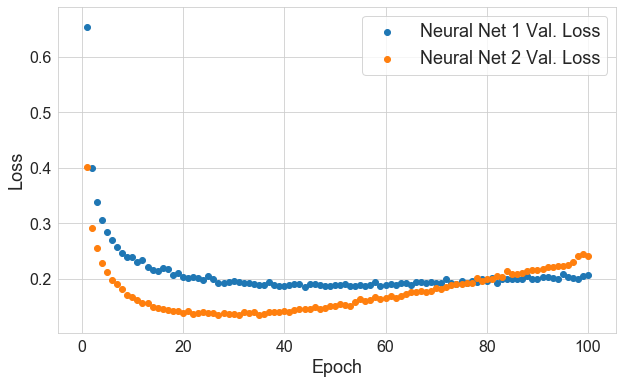

In [38]:
plt.figure(figsize = (10,6))

plt.scatter(range(1,101), history_dict['val_loss'], label = "Neural Net 1 Val. Loss")
plt.scatter(range(1,101), history_dict2['val_loss'], label = "Neural Net 2 Val. Loss")

plt.xlabel("Epoch", fontsize=18)
plt.ylabel("Loss", fontsize=18)

plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

plt.legend(fontsize=18)

plt.show()

Notice that Neural Net 2 gives a very low loss at some point. Let's find where that is. After that, we can use early stopping to capture that model.

In [39]:
print("The epoch that had the lowest model 2 loss was",
     range(101)[np.argmin(history_dict2['val_loss'])])

The epoch that had the lowest model 2 loss was 26


In [40]:
model2 = models.Sequential()

model2.add(layers.Dense(32, activation='relu', input_shape=(28*28,)))
model2.add(layers.Dense(32, activation='relu'))
model2.add(layers.Dense(10, activation='softmax'))

model2.compile(optimizer = 'adam',
                 loss = 'categorical_crossentropy',
                 metrics = ['accuracy'])

history2 = model2.fit(X_train,
                       y_train,
                       epochs = range(101)[np.argmin(history_dict2['val_loss'])],
                       batch_size = 512,
                       validation_data = (X_val, y_val))

history_dict2 = history2.history

Epoch 1/26
118/118 [==============================] - 1s 4ms/step - loss: 1.4176 - accuracy: 0.5811 - val_loss: 0.3516 - val_accuracy: 0.9020
Epoch 2/26
118/118 [==============================] - 0s 3ms/step - loss: 0.3251 - accuracy: 0.9085 - val_loss: 0.2679 - val_accuracy: 0.9242
Epoch 3/26
118/118 [==============================] - 0s 3ms/step - loss: 0.2594 - accuracy: 0.9262 - val_loss: 0.2329 - val_accuracy: 0.9336
Epoch 4/26
118/118 [==============================] - 0s 3ms/step - loss: 0.2269 - accuracy: 0.9356 - val_loss: 0.2077 - val_accuracy: 0.9421
Epoch 5/26
118/118 [==============================] - 0s 3ms/step - loss: 0.2032 - accuracy: 0.9438 - val_loss: 0.1900 - val_accuracy: 0.9463
Epoch 6/26
118/118 [==============================] - 0s 3ms/step - loss: 0.1870 - accuracy: 0.9466 - val_loss: 0.1726 - val_accuracy: 0.9511
Epoch 7/26
118/118 [==============================] - 0s 3ms/step - loss: 0.1718 - accuracy: 0.9500 - val_loss: 0.1645 - val_accuracy: 0.9532
Epoch 

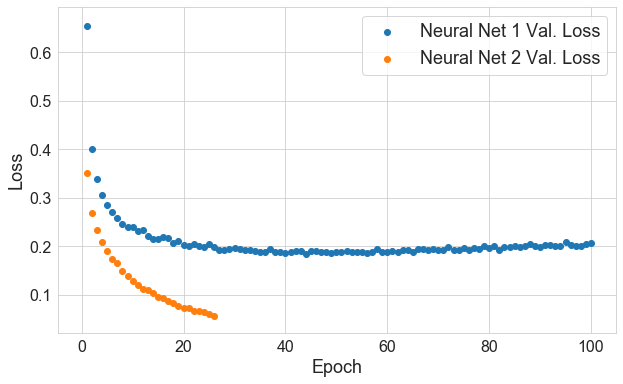

In [51]:
plt.figure(figsize = (10,6))

plt.scatter(range(1,101), history_dict['val_loss'], label = "Neural Net 1 Val. Loss")
plt.scatter(range(1,27), history_dict2['val_loss'], label = "Neural Net 2 Val. Loss")

plt.xlabel("Epoch", fontsize=18)
plt.ylabel("Loss", fontsize=18)

plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

plt.legend(fontsize=18)

plt.show()

## Try to do the same analysis on the MNIST Fasion dataset

Shape of data is (60000, 28, 28)


<Figure size 576x576 with 0 Axes>

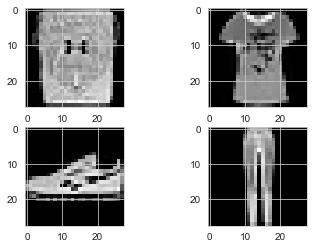

In [41]:
from keras.datasets import fashion_mnist
(X_train,y_train), (X_test,y_test) = fashion_mnist.load_data()

label_dict = {0:"tshirt/top",
                 1:"trouser",
                 2:"pullover",
                 3:"dress",
                 4:"coat",
                 5:"sandal",
                 6:"shirt",
                 7:"sneaker",
                 8:"bag",
                 9:"ankle boot"}

explore_data(X_train)